In [18]:
# 統計データ解析で使うパッケージ（モジュール）一覧
import pandas as pd # pandas:表（行列型＝構造化データ）データのハンドリングに特化
import numpy as np # 数値計算に特化
from scipy import stats,integrate #　確率関連と積分計算
import statsmodels.formula.api as smf #　回帰分析で使う
import statsmodels.api as sm # 統計解析全般
from matplotlib import pyplot as plt #　可視化

### MA(1)過程
$$y_t=\mu+\epsilon_t+\theta_1\epsilon_{t-1}$$
$$\epsilon_t\sim {W.N}(\sigma^2)$$

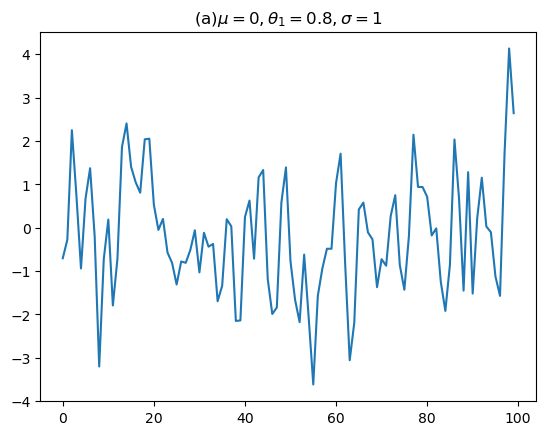

In [4]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=0
sigma=1
theta_1=0.8
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(a)$\mu=0,\\theta_1=0.8,\sigma=1$")
plt.show()

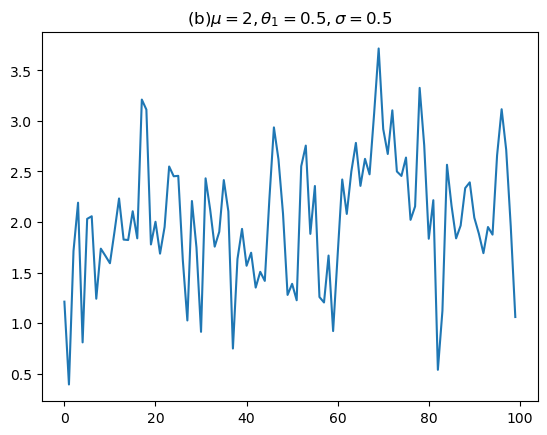

In [5]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=2
sigma=0.5
theta_1=0.5
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(b)$\mu=2,\\theta_1=0.5,\sigma=0.5$")
plt.show()

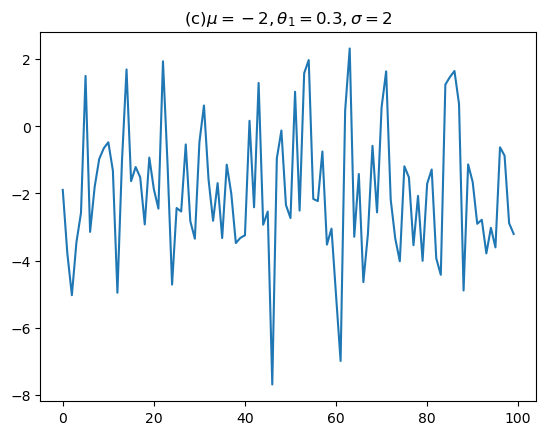

In [6]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=-2
sigma=2
theta_1=0.3
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(c)$\mu=-2,\\theta_1=0.3,\sigma=2$")
plt.show()

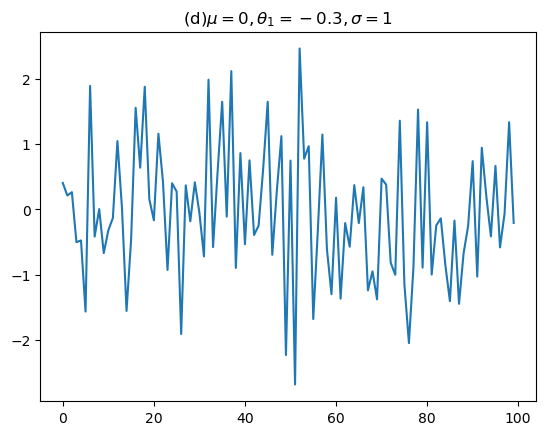

In [7]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=0
sigma=1
theta_1=-0.3
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(d)$\mu=0,\\theta_1=-0.3,\sigma=1$")
plt.show()

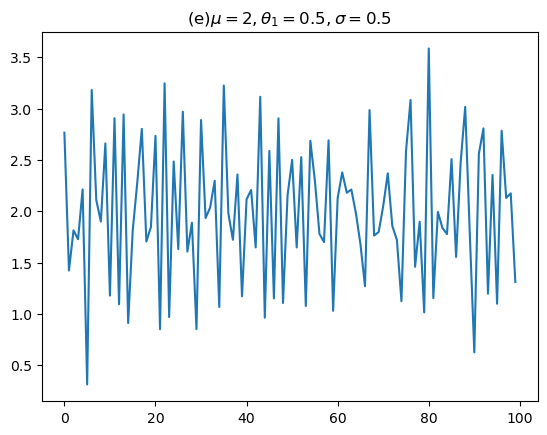

In [8]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=2
sigma=0.5
theta_1=-0.5
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(e)$\mu=2,\\theta_1=0.5,\sigma=0.5$")
plt.show()

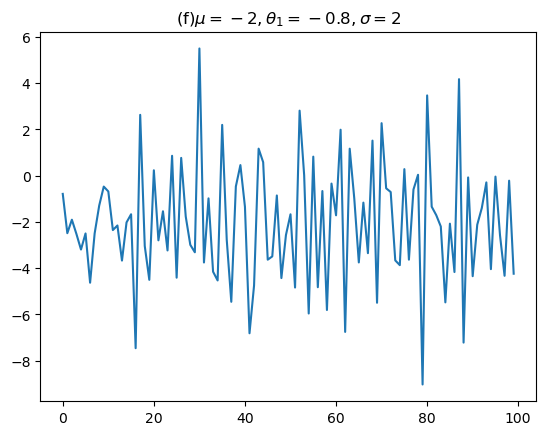

In [18]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=-2
sigma=2
theta_1=-0.8
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(f)$\mu=-2,\\theta_1=-0.8,\sigma=2$")
plt.show()

####  コレログラム

MA(1)
$$
y_t=\mu+\epsilon_t+\theta_1\epsilon_{t-1}
$$
MA(2)
$$
y_t=\mu+\epsilon_t+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}
$$

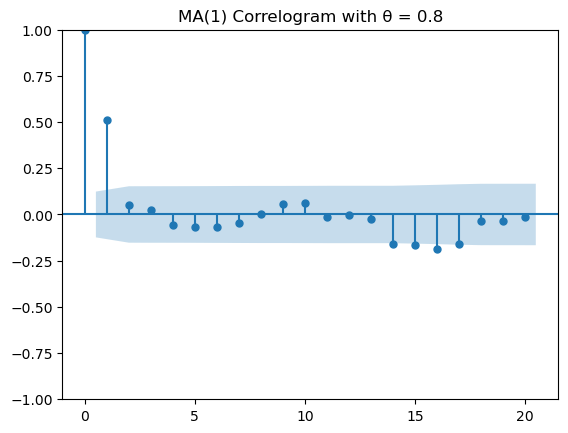

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# MA(1)過程のパラメータ
theta = 0.8
ar = np.array([1])  # AR部分はなし
ma = np.array([1, theta])  # MA部分
np.random.seed(123)

# ARMAモデルを使用して時系列データを生成
ma_process = ArmaProcess(ar, ma)
sample_size = 250
data = ma_process.generate_sample(nsample=sample_size)

# データのコレログラムを描画
fig, ax = plt.subplots()
plot_acf(data, lags=20, ax=ax)
ax.set_title(f"MA(1) Correlogram with θ = {theta}")
plt.show()


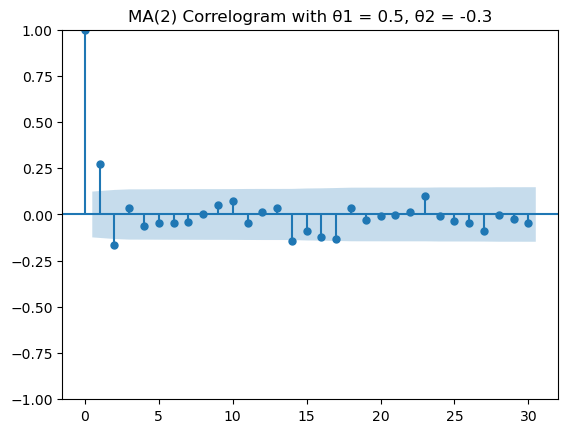

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# MA(2)過程のパラメータ
theta1 = 0.5
theta2 = -0.3
ar = np.array([1])  # AR部分はなし
ma = np.array([1, theta1, theta2])  # MA部分
np.random.seed(123)

# ARMAモデルを使用して時系列データを生成
ma_process = ArmaProcess(ar, ma)
sample_size = 250
data = ma_process.generate_sample(nsample=sample_size)

# データのコレログラムを描画
fig, ax = plt.subplots()
plot_acf(data, lags=30, ax=ax)
ax.set_title(f"MA(2) Correlogram with θ1 = {theta1}, θ2 = {theta2}")
plt.show()


### AR(1)過程
$$y_t=c+\phi_1y_{t-1}+\epsilon_t$$
$$\epsilon_t\sim {W.N}(\sigma^2)$$

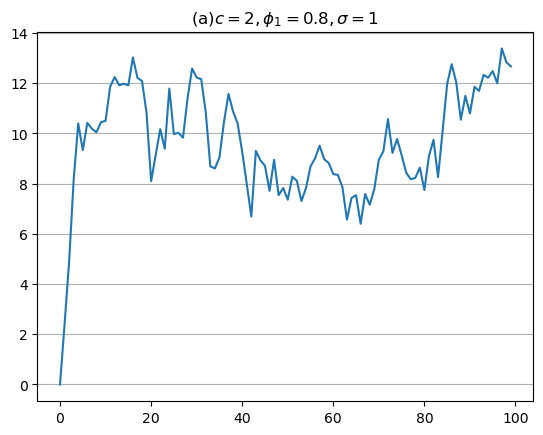

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# AR(1)過程のパラメータ
phi = 0.8
sigma = 1
c=2
n = 100

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(1)過程のデータを生成
y = np.zeros(n)
for i in range(1, n):
    y[i] = c+ phi * y[i-1] + e[i]

# プロット
plt.plot(y)
plt.title('(a)$c=2,\\phi_1=0.8,\sigma=1$')
plt.grid(axis="y")
plt.show()

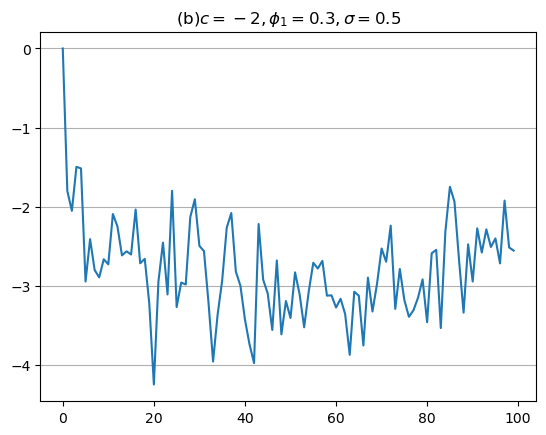

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# AR(1)過程のパラメータ
phi = 0.3
sigma = 0.5
c=-2
n = 100

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(1)過程のデータを生成
y = np.zeros(n)
for i in range(1, n):
    y[i] = c+ phi * y[i-1] + e[i]

# プロット
plt.plot(y)
plt.title('(b)$c=-2,\\phi_1=0.3,\sigma=0.5$')
plt.grid(axis="y")
plt.show()

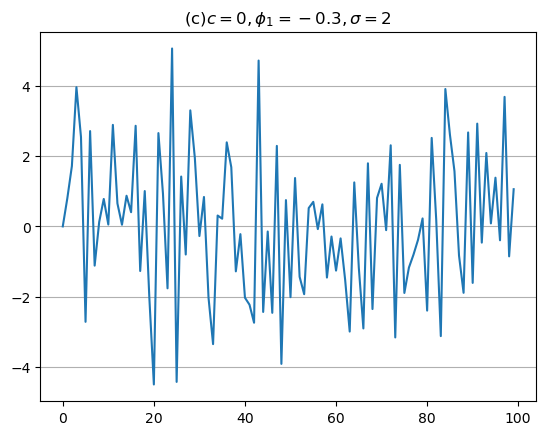

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# AR(1)過程のパラメータ
phi = -0.3
sigma = 2
c=0
n = 100

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(1)過程のデータを生成
y = np.zeros(n)
for i in range(1, n):
    y[i] = c+ phi * y[i-1] + e[i]

# プロット
plt.plot(y)
plt.title('(c)$c=0,\\phi_1=-0.3,\sigma=2$')
plt.grid(axis="y")
plt.show()

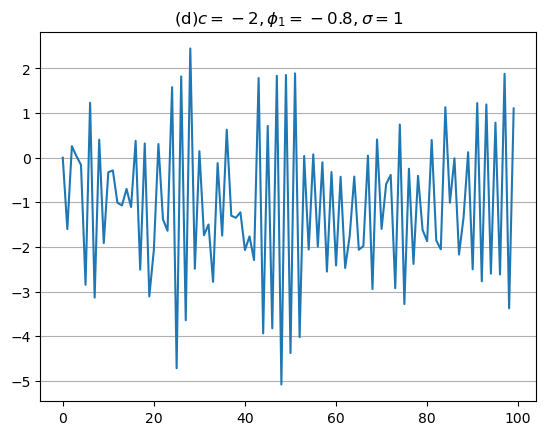

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# AR(1)過程のパラメータ
phi = -0.8
sigma = 1
c=-2
n = 100

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(1)過程のデータを生成
y = np.zeros(n)
for i in range(1, n):
    y[i] = c+ phi * y[i-1] + e[i]

# プロット
plt.plot(y)
plt.title('(d)$c=-2,\\phi_1=-0.8,\sigma=1$')
plt.grid(axis="y")
plt.show()

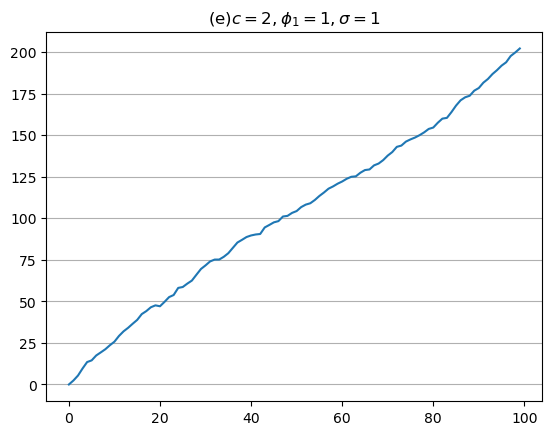

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# AR(1)過程のパラメータ
phi = 1
sigma = 1
c=2
n = 100

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(1)過程のデータを生成
y = np.zeros(n)
for i in range(1, n):
    y[i] = c+ phi * y[i-1] + e[i]

# プロット
plt.plot(y)
plt.title('(e)$c=2,\\phi_1=1,\sigma=1$')
plt.grid(axis="y")
plt.show()

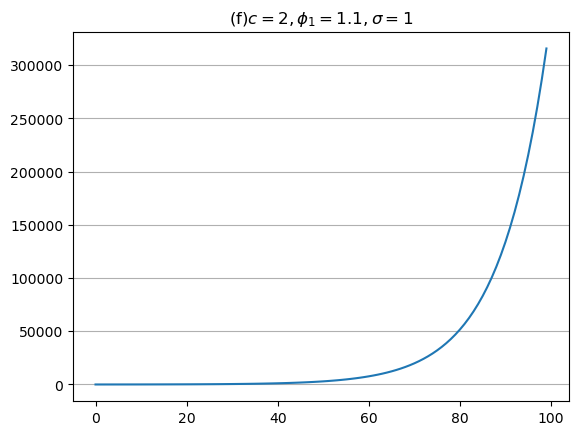

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# AR(1)過程のパラメータ
phi = 1.1
sigma = 1
c=2
n = 100

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(1)過程のデータを生成
y = np.zeros(n)
for i in range(1, n):
    y[i] = c+ phi * y[i-1] + e[i]

# プロット
plt.plot(y)
plt.title('(f)$c=2,\\phi_1=1.1,\sigma=1$')
plt.grid(axis="y")
plt.show()

#### コレログラム

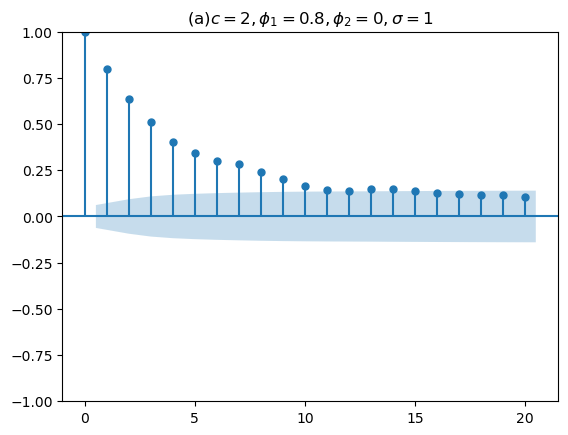

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# AR(2)過程のパラメータ
c=2
phi1 = 0.8
phi2 = 0
sigma = 1
n = 1000

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(2)過程のデータを生成
x = np.zeros(n)
for i in range(2, n):
    x[i] = c+ phi1 * x[i-1] + phi2 * x[i-2] + e[i]

# コレログラムのプロット
plot_acf(x, lags=20)
plt.title('(a)$c=2,\\phi_1=0.8,\\phi_2=0,\sigma=1$')
plt.show()

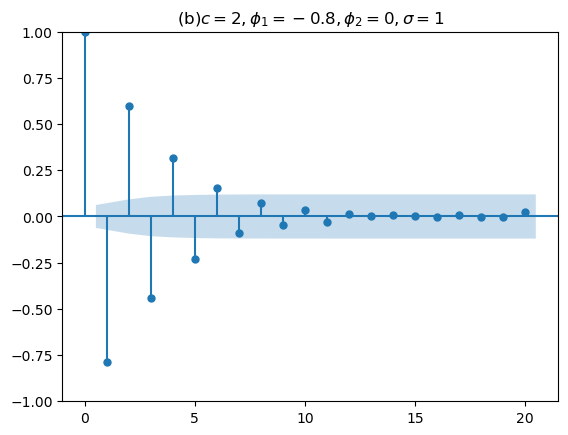

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# AR(2)過程のパラメータ
c=2
phi1 = -0.8
phi2 = 0
sigma = 1
n = 1000

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(2)過程のデータを生成
x = np.zeros(n)
for i in range(2, n):
    x[i] = c+ phi1 * x[i-1] + phi2 * x[i-2] + e[i]

# コレログラムのプロット
plot_acf(x, lags=20)
plt.title('(b)$c=2,\\phi_1=-0.8,\\phi_2=0,\sigma=1$')
plt.show()

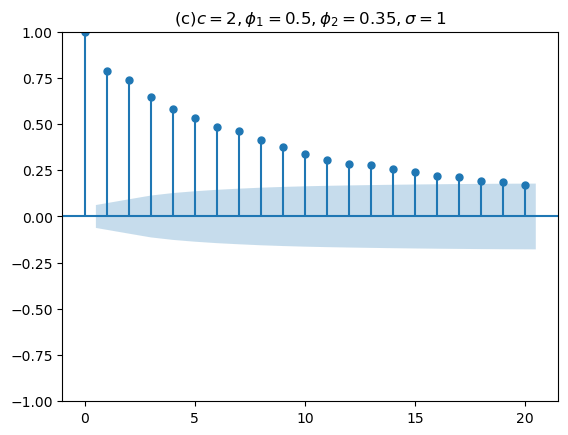

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# AR(2)過程のパラメータ
c=2
phi1 = 0.5
phi2 = 0.35
sigma = 1
n = 1000

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(2)過程のデータを生成
x = np.zeros(n)
for i in range(2, n):
    x[i] = c+ phi1 * x[i-1] + phi2 * x[i-2] + e[i]

# コレログラムのプロット
plot_acf(x, lags=20)
plt.title('(c)$c=2,\\phi_1=0.5,\\phi_2=0.35,\sigma=1$')
plt.show()

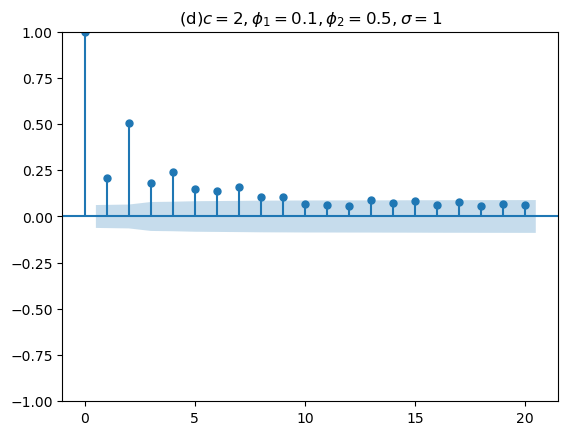

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# AR(2)過程のパラメータ
c=2
phi1 = 0.1
phi2 = 0.5
sigma = 1
n = 1000

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(2)過程のデータを生成
x = np.zeros(n)
for i in range(2, n):
    x[i] = c+ phi1 * x[i-1] + phi2 * x[i-2] + e[i]

# コレログラムのプロット
plot_acf(x, lags=20)
plt.title('(d)$c=2,\\phi_1=0.1,\\phi_2=0.5,\sigma=1$')
plt.show()

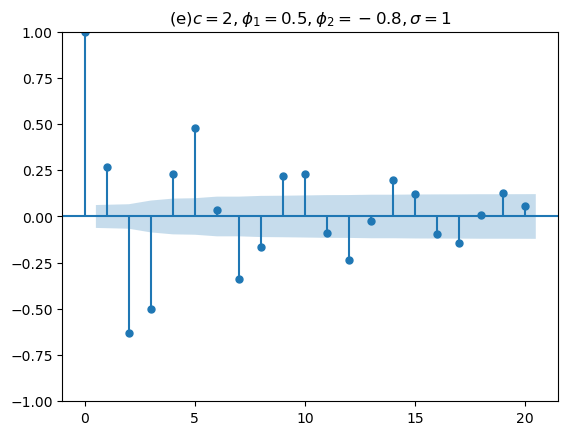

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# AR(2)過程のパラメータ
c=2
phi1 = 0.5
phi2 = -0.8
sigma = 1
n = 1000

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(2)過程のデータを生成
x = np.zeros(n)
for i in range(2, n):
    x[i] = c+ phi1 * x[i-1] + phi2 * x[i-2] + e[i]

# コレログラムのプロット
plot_acf(x, lags=20)
plt.title('(e)$c=2,\\phi_1=0.5,\\phi_2=-0.8,\sigma=1$')
plt.show()

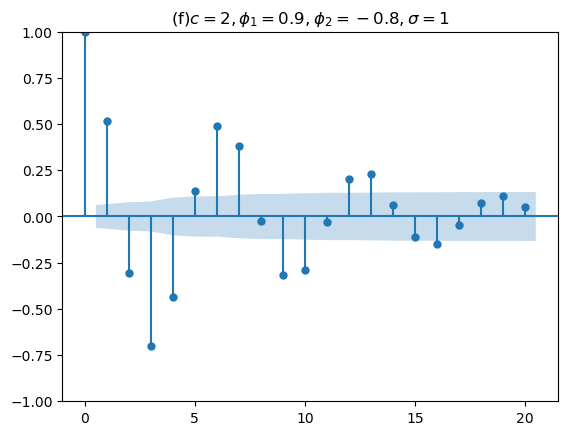

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# AR(2)過程のパラメータ
c=2
phi1 = 0.9
phi2 = -0.8
sigma = 1
n = 1000

# ホワイトノイズの生成
np.random.seed(0)
e = np.random.normal(0, sigma, n)

# AR(2)過程のデータを生成
x = np.zeros(n)
for i in range(2, n):
    x[i] = c+ phi1 * x[i-1] + phi2 * x[i-2] + e[i]

# コレログラムのプロット
plot_acf(x, lags=20)
plt.title('(f)$c=2,\\phi_1=0.9,\\phi_2=-0.8,\sigma=1$')
plt.show()